In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
# Define paths
dataset_path = 'Drowsiness_Detection_Data'
categories = ['Active','Fatigue']

In [7]:
# Initialize lists to hold images and labels
images = []
labels = []

In [8]:
# Load images
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for valid image extensions
            print(f"Warning: {img_name} is not a valid image file. Skipping this file.")
            continue
        
        img_path = os.path.join(category_path, img_name)
        # Load the image
        img = cv2.imread(img_path)
        
        # Check if the image was loaded successfully
        if img is None:
            print(f"Warning: Unable to load image at {img_path}. Skipping this file.")
            continue  # Skip to the next file if the image is not loaded

        # Resize the image to a fixed size (e.g., 64x64)
        img = cv2.resize(img, (64, 64))
        # Normalize the image
        img = img / 255.0  # Scale pixel values to [0, 1]
        images.append(img)
        labels.append(categories.index(category))  # Assign label 

In [9]:
# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

In [10]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(f'Training data shape: {X_train.shape}, Validation data shape: {X_val.shape}')

Training data shape: (5749, 64, 64, 3), Validation data shape: (1438, 64, 64, 3)


In [12]:
# Define image dimensions
image_height = 64  # Height of the image
image_width = 64   # Width of the image
channels = 3       # Number of color channels (3 for RGB)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add more layers as needed
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Save the model
model.save('drowsiness_detection_model.h5')

C:\Users\Mihir\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.7290 - loss: 0.5145 - val_accuracy: 0.8442 - val_loss: 0.3549
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.8441 - loss: 0.3572 - val_accuracy: 0.8693 - val_loss: 0.3012
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.8547 - loss: 0.3359 - val_accuracy: 0.8783 - val_loss: 0.2857
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.8698 - loss: 0.3071 - val_accuracy: 0.8769 - val_loss: 0.2996
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8805 - loss: 0.2877 - val_accuracy: 0.8727 - val_loss: 0.2821
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8876 - loss: 0.2686 - val_accuracy: 0.8936 - val_loss: 0.2717
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8863 - loss: 0.2724 - val_accuracy: 0.8373 - val_loss: 0.3417
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8848 - loss: 0.2747 - val_a

In [13]:
# Assuming you have your model trained and X_val, y_val defined
y_pred = (model.predict(X_val) > 0.5).astype("int32")  # Convert probabilities to binary predictions

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [14]:
# Calculate confusion matrix
cm = confusion_matrix(y_val, y_pred)

In [15]:
# Print classification report
print(classification_report(y_val, y_pred, target_names=['Active', 'Fatigue']))

              precision    recall  f1-score   support

      Active       0.86      0.95      0.91       809
     Fatigue       0.93      0.81      0.86       629

    accuracy                           0.89      1438
   macro avg       0.90      0.88      0.88      1438
weighted avg       0.89      0.89      0.89      1438



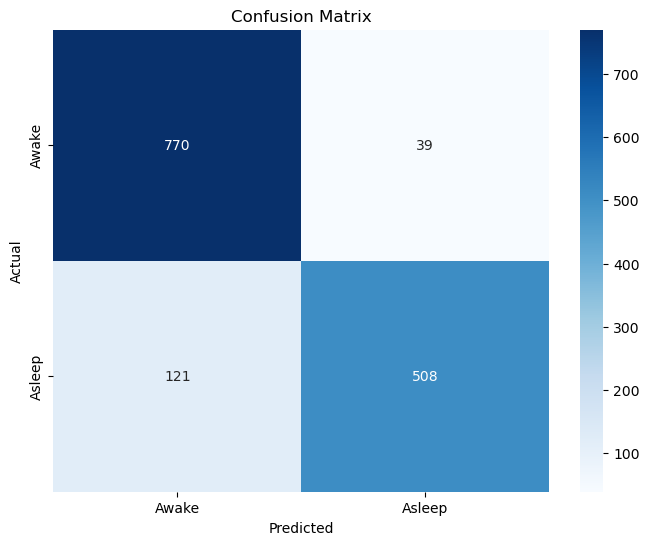

In [16]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Awake', 'Asleep'], yticklabels=['Awake', 'Asleep'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Save the entire model (architecture + weights)
model.save('drowsiness_detection_model.h5')

In [18]:
from PyQt5 import QtWidgets, QtGui,QtCore
from PyQt5.QtWidgets import QFileDialog, QMessageBox, QLabel, QPushButton, QVBoxLayout, QHBoxLayout, QGridLayout, QStatusBar, QWidget
import sys
from tensorflow.keras.models import load_model

In [19]:
class DrowsinessDetectionApp(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()
        self.model = load_model('drowsiness_detection_model.h5')  # Load your trained model

    def initUI(self):
        self.setWindowTitle('Drowsiness Detection')
        self.setGeometry(100, 100, 600, 400)

        # Layout
        layout = QVBoxLayout()

        # Title Label
        titleLabel = QLabel('Drowsiness Detection Application', self)
        titleLabel.setAlignment(QtCore.Qt.AlignCenter)
        titleLabel.setStyleSheet("font-size: 20px; font-weight: bold;")
        layout.addWidget(titleLabel)

        # Instructions Label
        instructionsLabel = QLabel('Load an image or video to detect drowsiness.', self)
        instructionsLabel.setAlignment(QtCore.Qt.AlignCenter)
        layout.addWidget(instructionsLabel)

        # Image display label
        self.imageLabel = QLabel(self)
        self.imageLabel.setFixedSize(300, 300)
        layout.addWidget(self.imageLabel)

        # Buttons
        buttonLayout = QHBoxLayout()
        self.loadImageButton = QPushButton('Load Image', self)
        self.loadImageButton.clicked.connect(self.load_image)
        buttonLayout.addWidget(self.loadImageButton)

        self.loadVideoButton = QPushButton('Load Video', self)
        self.loadVideoButton.clicked.connect(self.load_video)
        buttonLayout.addWidget(self.loadVideoButton)

        self.clearButton = QPushButton('Clear', self)
        self.clearButton.clicked.connect(self.clear_display)
        buttonLayout.addWidget(self.clearButton)

        self.saveButton = QPushButton('Save Result', self)
        self.saveButton.clicked.connect(self.save_result)
        buttonLayout.addWidget(self.saveButton)

        layout.addLayout(buttonLayout)

        # Status Bar
        self.statusBar = QStatusBar(self)
        layout.addWidget(self.statusBar)

        self.setLayout(layout)

    def load_image(self):
        options = QFileDialog.Options()
        fileName, _ = QFileDialog.getOpenFileName(self, "Load Image", "", "Images (*.png *.jpg *.jpeg);;All Files (*)", options=options)
        if fileName:
            self.detect_drowsiness(fileName)

    def load_video(self):
        options = QFileDialog.Options()
        fileName, _ = QFileDialog.getOpenFileName(self, "Load Video", "", "Videos (*.mp4 *.avi);;All Files (*)", options=options)
        if fileName:
            self.process_video(fileName)

    def detect_drowsiness(self, image_path):
        # Load and preprocess the image
        img = cv2.imread(image_path)
        img = cv2.resize(img, (64, 64))  # Resize to match model input
        img = img / 255.0  # Normalize
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        # Make prediction
        prediction = self.model.predict(img)
        result = 'Asleep' if prediction[0][0] > 0.5 else 'Awake'

        # Show result in a pop-up message
        QMessageBox.information(self, "Detection Result", f"The person is: {result}")

        # Update status bar
        self.statusBar.showMessage(f"Image processed: {result}")

        # Display the image
        self.display_image(image_path)

    def process_video(self, video_path):
        cap = cv2.VideoCapture(video_path)
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Preprocess the frame
            img = cv2.resize(frame, (64, 64))  # Resize to match model input
            img = img / 255.0  # Normalize
            img = np.expand_dims(img, axis=0)  # Add batch dimension

            # Make prediction
            prediction = self.model.predict(img)
            result = 'Asleep' if prediction[0][0] > 0.5 else 'Awake'

            # Display the result on the frame
            cv2.putText(frame, f"Status: {result}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0) if result == 'Awake' else (0, 0, 255), 2)

            # Convert frame to QImage and display in QLabel
            height, width, channel = frame.shape
            bytesPerLine = 3 * width
            qImg = QtGui.QImage(frame.data, width, height, bytesPerLine, QtGui.QImage.Format_RGB888).rgbSwapped()
            self.imageLabel.setPixmap(QtGui.QPixmap.fromImage(qImg))

            # Update status bar
            self.statusBar.showMessage(f"Processing video... Current status: {result}")

            # Break the loop on 'q' key press
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()

    def display_image(self, image_path):
        # Load the image and convert it to QPixmap
        img = QtGui.QImage(image_path)
        img = img.scaled(300, 300, QtCore.Qt.KeepAspectRatio)  # Resize for display
        self.imageLabel.setPixmap(QtGui.QPixmap.fromImage(img))

    def clear_display(self):
        self.imageLabel.clear()
        self.statusBar.clearMessage()

    def save_result(self):
        options = QFileDialog.Options()
        fileName, _ = QFileDialog.getSaveFileName(self, "Save Result", "", "Text Files (*.txt);;All Files (*)", options=options)
        if fileName:
            with open(fileName, 'w') as f:
                f.write(self.statusBar.currentMessage())


In [20]:
app = QtWidgets.QApplication(sys.argv)
window = DrowsinessDetectionApp()
window.show()
sys.exit(app.exec_())

SystemExit: 0

C:\Users\Mihir\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
